In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [3]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

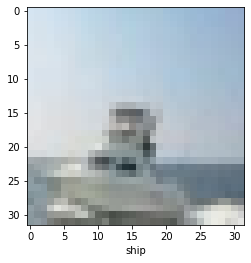

In [6]:
# Let's look at a one image
IMG_INDEX = 100  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.summary()  # let's have a look at our model so far

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.7684 - accuracy: 0.3451 - val_loss: 1.3274 - val_accuracy: 0.5160
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.2049 - accuracy: 0.5721 - val_loss: 1.1067 - val_accuracy: 0.6106
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0288 - accuracy: 0.6355 - val_loss: 1.0490 - val_accuracy: 0.6334
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9154 - accuracy: 0.6763 - val_loss: 0.9334 - val_accuracy: 0.6731
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8363 - accuracy: 0.7040 - val_loss: 0.9148 - val_accuracy: 0.6819
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7871 - accuracy: 0.7247 - val_loss: 0.8914 - val_accuracy: 0.6823
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7373 - accuracy: 0.7415 - val_loss: 0.8657 -

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.9083 - accuracy: 0.7031
0.7031000256538391


In [14]:
predictions = model.predict(test_images)

In [22]:
import numpy as np

class_names[np.argmax(predictions[0])]


'cat'

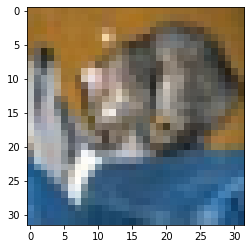

In [23]:
plt.imshow(test_images[0])